![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S7_clase_analisis_geografico_I/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Semana 7. Sesión Sincrónica.


El  *cuaderno* tiene como objetivo introducir a los estudiantes a estimaciones de densidad.

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.



# Estimacion de densidades

La estimación de densidad camina la delgada linea la línea entre el aprendizaje no supervisado, la ingeniería de características (feature engineering) y el modelado de datos.


## Para que sirve?


$X_1, \dots X_n \sim_{iid} F$ con densidad $f$


El objetivo es estimar la densidad $f$ con $\hat{f}$

Para qué?

- Muchas técnicas de clustering utilizan la densidad (este curso)
- Regresiones no paramétricas $\hat{f}(x,y) \rightarrow \hat{E}(y|x)= \int y \hat{f}(y|x) dy$
- Clasificación: Regla de Bayes $\hat{p}(Y=1|X) > 0.5 \rightarrow$ Clasificar como 1.



En este curso nos centraremos en dos de las técnicas más populares:

 - Estimacion de densidad de Kernel (no paramétrico)
 - Modelos de Mezclas Gausianes (MMG) (paramétrico)

## Métodos Paramétricos
Asumen una forma funcional para $p$ :


  \begin{align}
  f\left(x_o\right)=\phi\left(x_o\right)=\frac{1}{\sigma\sqrt{2\ \pi}}\exp{\left\lfloor-\ \frac{1}{2}\left(\frac{x_o-\mu}{\sigma}\right)^2\right\rfloor}
  \end{align}


La ignorancia sobre $f\left(x_o\right)$ se limita a la ignorancia de dos parámetros $\mu$ and $\sigma$

## Métodos no paramétricos


- Buscan estimar $f(x)$ sin asumir una forma funcional particular, sólo suponiendo ciertas condiciones de regularidad de la densidad (suavidad, diferenciabilidad)


-  ¿Cómo se interpreta la información muestral?


-  Si observamos más datos “cerca” de $x$ que de $x'$ inferimos que $f(x )> f(x') $

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S7_clase_analisis_geografico_I/main/figs/nonpar1.png)

## Histogramas


La estimación de densidad es un concepto muy simple y la mayoría de las personas ya están familiarizadas con una técnica común de estimación de densidad: el histograma.

El histograma consiste en estimar la probabilidad dentro de intervalos a través de la frecuencia relativa de observaciones dentro de ese intervalo.

Los intervalos se determinan a partir de un punto inicial $a$ y un ancho de banda $w$

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S7_clase_analisis_geografico_I/main/figs/nonpar2.png)


El área de las barras es la frecuencia relativa:
$$\frac{ Número \, de\, obs. \,en \,intervalo}{n}$$

La altura de las barras es un estimador de la densidad en cualquier punto del intervalo.


\begin{align}
\hat{f}\left(x_o\right)=\ \frac{Número \, de\, obs. \,en \,intervalo}{n\ \times\ w}
\end{align}

In [1]:
#Cargamos las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(-0.05, 1.0)

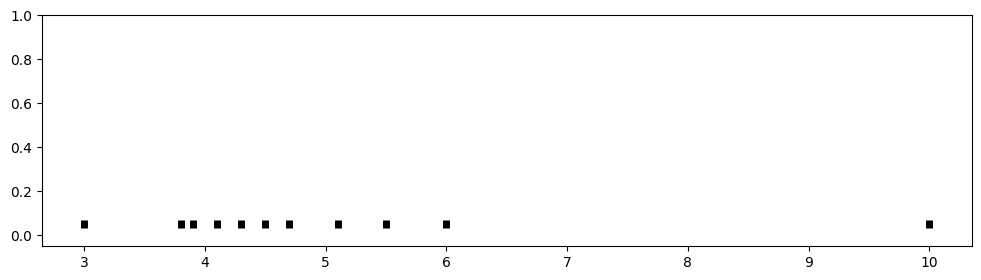

In [2]:
X = np.array([3,3.8, 3.9, 4.1, 4.3,4.5,4.7, 5.1,5.5, 6, 10])
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(X, np.full_like(X, 0.05), '|k', markeredgewidth=5)
ax.set_ylim(-0.05,1)

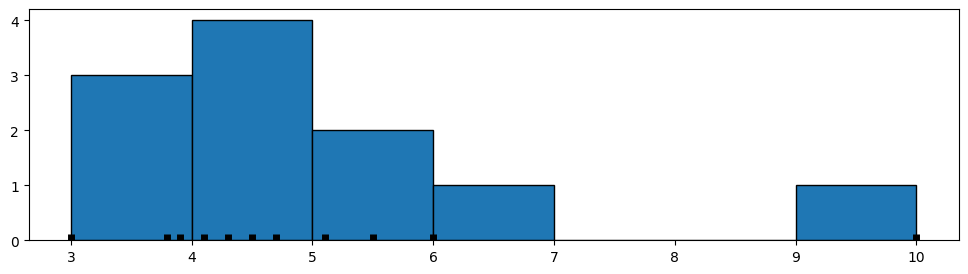

In [3]:
fig, ax = plt.subplots(figsize=(12,3))
ax.hist(X,align="mid",bins=[3,4,5,6,7,8,9,10],edgecolor="black")
ax.plot(X, np.full_like(X, 0.05), '|k', markeredgewidth=5)

**Problemas del histograma: (1) depende del punto inicial**

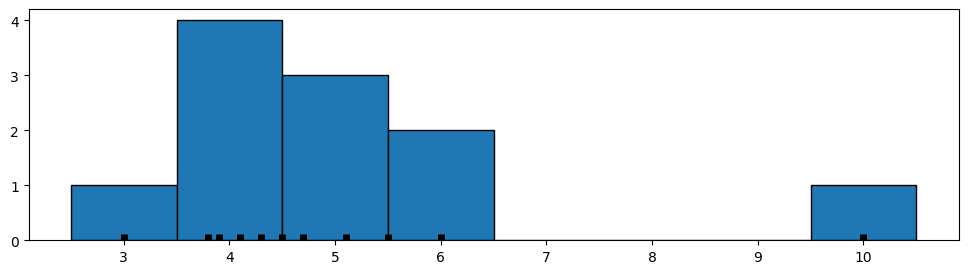

In [4]:
fig, ax = plt.subplots(figsize=(12,3))
ax.hist(X,align="mid",bins=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5],edgecolor="black")
ax.plot(X, np.full_like(X, 0.05), '|k', markeredgewidth=5)

**Problemas del histograma: (2) depende del ancho de banda**

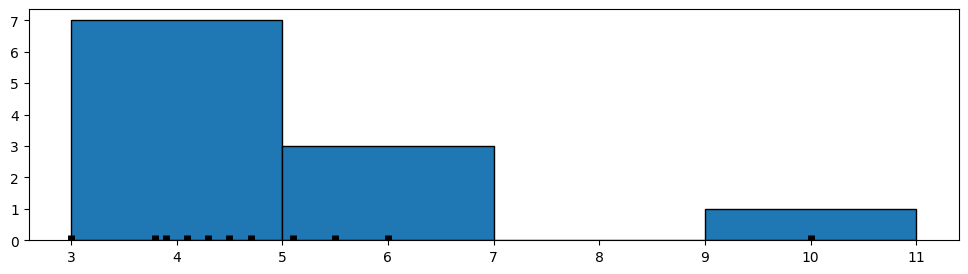

In [5]:
fig, ax = plt.subplots(figsize=(12,3))
ax.hist(X,align="mid",bins=[3,5,7,9,11],edgecolor="black")
ax.plot(X, np.full_like(X, 0.05), '|k', markeredgewidth=5)

**Problemas del histograma: (3) es discontinuo en los bordes de los intervalos**

## KDE



$$\hat{f_h}(x)=\frac{1}{nh}\sum_{i=1}^nK\left(\frac{x-x_i}{h}\right)$$

Donde $K$ es una función no negativa llamada kernel y $h > 0$ es un parámetro de suavización llamado ancho de banda.



Depende de dos cosas, $K$ y $h$

### El Kernel ($K$)

- Formalmente el kernel es una función no negativa que controla la forma de la densidad y tiene ciertas propiedades deseables:

1. Simetría: $K(u)=K(-u)$.
2. Normalizada de modo que $\int_{-\infty}^\infty K(u) du = 1$.
3. Monótona decreciente tal que $K'(u)<0$ cuando $u>0$.
4. Valor esperado igual a 0: $E[K]=0$.


- Intuitivamente esta función sirve como ponderador de la contribución de cada dato. A diferencia del histograma donde el estimador asigna el mismo valor de densidad a cada uno de los puntos del intervalo, KDE asigna en función del kernel.


- Ilustremos con un ejemplo

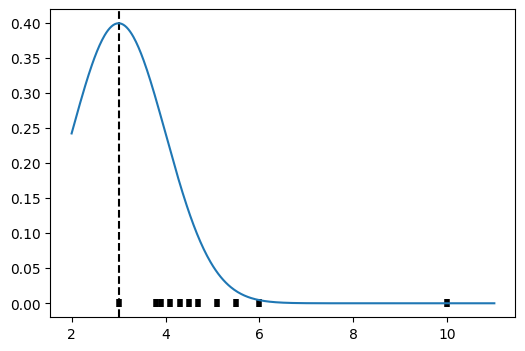

In [6]:
from scipy import stats

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(X, np.full_like(X, 0), '|k', markeredgewidth=4)

Xgrid = np.linspace(min(X) - 1, max(X) + 1, num=500)


dens = stats.norm.pdf(Xgrid, loc=X[0], scale=1)
ax.axvline(x=X[0], linestyle='--', color='black')
ax.plot(Xgrid, dens)

In [7]:
stats.norm.pdf(3, loc=X[0], scale=1)

np.float64(0.3989422804014327)

In [8]:
stats.norm.pdf(10, loc=X[0], scale=1)

np.float64(9.134720408364595e-12)

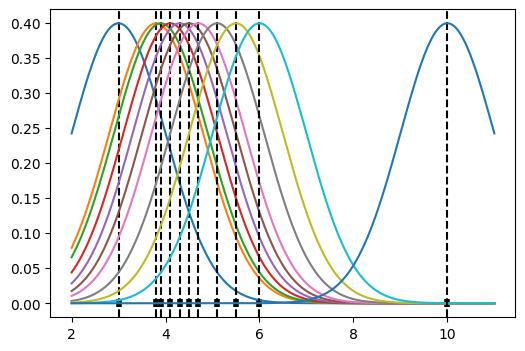

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(X, np.full_like(X, 0), '|k', markeredgewidth=4)

Xgrid = np.linspace(min(X) - 1, max(X) + 1, num=500)

for x in X:
    dens = stats.norm.pdf(Xgrid, loc=x, scale=1)
    ax.axvline(x=x, linestyle='--', color='black')
    ax.plot(Xgrid, dens)

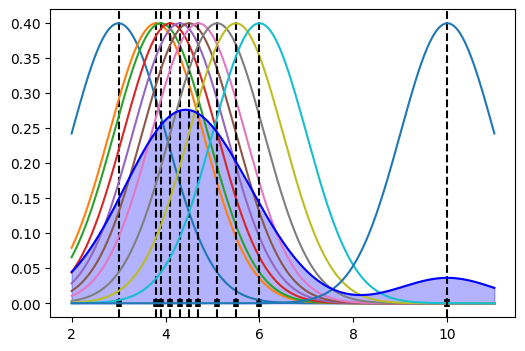

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(X, np.full_like(X, 0), '|k', markeredgewidth=4)

Xgrid = np.linspace(min(X) - 1, max(X) + 1, num=500)

sum = np.full_like(Xgrid, 0)
for x in X:
    dens = stats.norm.pdf(Xgrid, loc=x, scale=1)
    sum = sum + dens
    ax.axvline(x=x, linestyle='--', color='black')
    ax.plot(Xgrid, dens)

sum = sum / len(X)
ax.plot(Xgrid, sum, color='b')
ax.fill_between(Xgrid, sum, alpha=0.3, color='b');

### El ancho de Banda ($h$)

- Este es el parámetro más importante en la estimación de densidad de kernel;

- Si el ancho de banda es bajo, la densidad estimada tendrá un suavizado limitado, lo que quiere decir que la densidad va a capturar todo el ruido de los datos de la muestra.

- Por el contrario, si el ancho de banda es alto, la densidad estimada será muy suave, omitiendo las características de la densidad real.

- La métrica de evaluación es el

\begin{align}
MSE(\hat{f} (x_o)) = Sesgo^2(\hat{f} (x_o)) +Var(\hat{f} (x_o))
\end{align}

- Formalmente, en la elección del ancho de banda entra en juego el "dilema" (*trade-off*) sesgo-varianza:

\begin{align}
  Sesgo [\hat{f} (x_o)] \approx \frac{h^2}{2}  f''(x_o ) \int_{-\infty}^\infty K(\phi) \phi^2  d\phi   
\end{align}


\begin{align}
   Var [\hat{f} (x_o)] \approx \frac{1}{n\times h}  f(x_o ) \int_{-\infty}^\infty K^2(\phi)   d\phi   
\end{align}



In [11]:
#Llamamos librerias
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import make_blobs

In [12]:
X, y_true = make_blobs(n_samples=200, centers=[(-74.06383, 4.638495), (-74.03144, 4.693142), (-74.07207, 4.596605)],
                       cluster_std=0.01, random_state=123)

In [13]:
df=pd.DataFrame(X)
df=df.rename(columns={0: "Longitud", 1: "Latitud"})

In [14]:
df['cluster_true']=y_true
df.head()

,Longitud,Latitud,cluster_true
0,-74.042959,4.640139,0
1,-74.062020,4.650274,0
2,-74.062623,4.645977,0
3,-74.075827,4.582808,2
4,-74.075309,4.594722,2


In [15]:
import folium

map = folium.Map(location = [df['Latitud'].mean(),df['Longitud'].mean()], tiles = "OpenStreetMap", zoom_start = 10)


colour = ['red',
    'orange',
    'green']

def colorCall(val):
  val = int(val)
  return colour[val]

#capa clusters de teatros
for lat, lon, c in zip(df['Latitud'], df['Longitud'], df['cluster_true']):
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        fill_color = colorCall(c),
        fill=True,
        color=colorCall(c),
        fill_opacity=0.7
        ).add_to(map)


#Display el mapa
#map

- Generemos como centro la [Plaza de Bolívar](https://en.wikipedia.org/wiki/Plaza_de_Bol%C3%ADvar,_Bogot%C3%A1)

In [16]:
PB = pd.DataFrame({
    "lugar": ["Plaza de Bolívar"],
    "Latitud": [4.598128],
    "Longitud": [-74.076044]
    })
PB

,lugar,Latitud,Longitud
0,Plaza de Bolívar,4.598128,-74.076044


In [17]:
folium.Marker(
      location=[PB.iloc[0]['Latitud'], PB.iloc[0]['Longitud']]
).add_to(map)
map

- Calculo distancias

In [18]:
import geopandas as gpd
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitud, df.Latitud))
df.crs = "EPSG:4326"

df["coordenadas"] = df["geometry"].apply(lambda x: x.representative_point().coords[:][0])

In [19]:

PB = gpd.GeoDataFrame(PB, geometry = gpd.points_from_xy(PB.Longitud, PB.Latitud))
PB.crs = "EPSG:4326"
PB["coordenadas"] = PB["geometry"].apply(lambda x: x.representative_point().coords[:][0])
PB



,lugar,Latitud,Longitud,geometry,coordenadas
0,Plaza de Bolívar,4.598128,-74.076044,POINT (-74.07604 4.59813),"(-74.076044, 4.598128)"


In [20]:
from geopy.distance import geodesic

distances = []

for p in range(df.shape[0]):
    punto = df.coordenadas[p]
    distancia = geodesic(
            (PB.coordenadas[:][0][1], PB.coordenadas[:][0][0]),
            (punto[1], punto[0])).km
    distances.append(distancia)

df['distancias'] = distances

df.head()

,Longitud,Latitud,cluster_true,geometry,coordenadas,distancias
0,-74.042959,4.640139,0,POINT (-74.04296 4.64014),"(-74.04295886640412, 4.640139412302298)",5.921117
1,-74.062020,4.650274,0,POINT (-74.06202 4.65027),"(-74.06201964870402, 4.650273619388086)",5.972624
2,-74.062623,4.645977,0,POINT (-74.06262 4.64598),"(-74.06262252636903, 4.645977156171872)",5.496815
3,-74.075827,4.582808,2,POINT (-74.07583 4.58281),"(-74.07582749910982, 4.582807750213413)",1.694305
4,-74.075309,4.594722,2,POINT (-74.07531 4.59472),"(-74.07530859783785, 4.594722031415063)",0.385376


In [21]:
df['distancias'].describe()

,distancias
count,200.000000
mean,5.893941
std,4.397348
min,0.074107
25%,1.816320
50%,4.734447
75%,11.180087
max,14.651486


- Estimo densidades

<Axes: xlabel='distancias', ylabel='Density'>

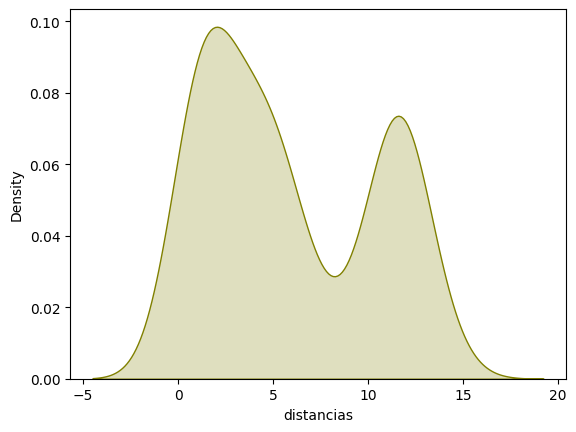

In [22]:
import seaborn as sns

#sns.histplot(df['distancias'], multiple="layer", kde=True)
sns.kdeplot(df['distancias'], shade=True, bw='scott', color="olive")

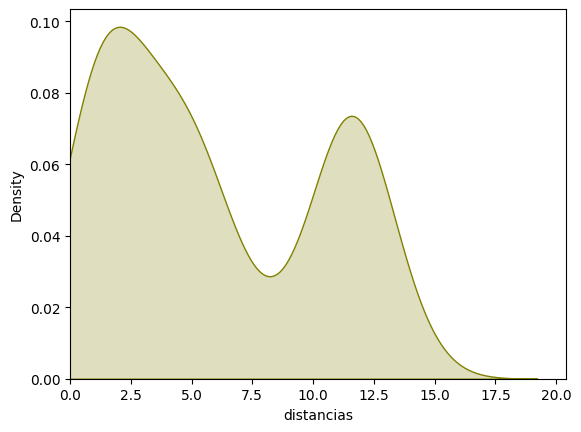

In [23]:
import matplotlib.pyplot as plt

sns.kdeplot(df['distancias'], shade=True, bw='scott', color="olive")
plt.xlim(0, None)
plt.show()

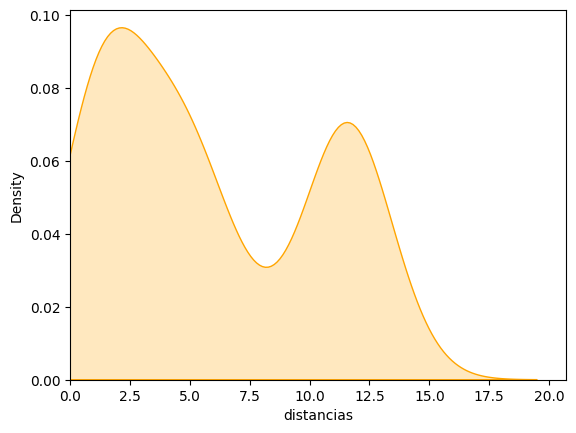

In [24]:
sns.kdeplot(df['distancias'], shade=True, bw='silverman', color="orange")
plt.xlim(0, None)
plt.show()

In [25]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

bandwidths = 10 ** np.linspace(-2, .001, 20)
bandwidths[0:20]


array([0.01      , 0.01274429, 0.0162417 , 0.0206989 , 0.02637929,
       0.03361855, 0.04284447, 0.05460225, 0.06958671, 0.08868335,
       0.11302067, 0.14403687, 0.18356483, 0.23394042, 0.29814055,
       0.37995909, 0.48423105, 0.61711829, 0.78647371, 1.00230524])

In [26]:
grid = {
    'bandwidth': bandwidths,
    'kernel': ['gaussian','epanechnikov', 'tophat', 'linear']
}

gridCV = GridSearchCV(KernelDensity(),
                    param_grid=grid,
                    cv=5,verbose=0)
vals=df['distancias'].to_numpy().reshape(-1, 1)
gridCV.fit(vals)

GridSearchCV(cv=5, estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.01      , 0.01274429, 0.0162417 , 0.0206989 , 0.02637929,
       0.03361855, 0.04284447, 0.05460225, 0.06958671, 0.08868335,
       0.11302067, 0.14403687, 0.18356483, 0.23394042, 0.29814055,
       0.37995909, 0.48423105, 0.61711829, 0.78647371, 1.00230524]),
                         'kernel': ['gaussian', 'epanechnikov', 'tophat',
                                    'linear']})

In [27]:
gridCV.best_params_

{'bandwidth': np.float64(0.48423104735421807), 'kernel': 'gaussian'}

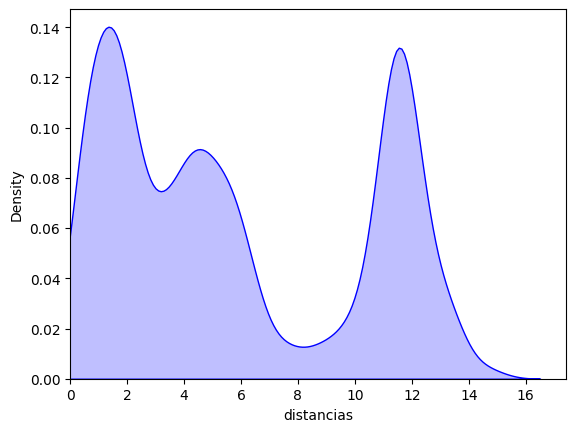

In [28]:
sns.kdeplot(df['distancias'], shade=True, bw=0.14, color="blue")
plt.xlim(0, None)
plt.show()

## Análisis de puntos calientes y estimación de densidades de kernel bivariadas

- El análisis de puntos de puntos calientes se busca encontrar áreas donde hay más concentración de puntos de datos,


- Es similar a DBSCAN pero vamos a usar un enfoque que viene de la estadistíca: estimación de densidades.


- Cuando los datos son geográficos, nos encontramos en dos dimensiones. Es decir, la frecuencia está ahora determinada por dos variables: longitud y latitud.


- Teóricamente podemos usar y extender el mismo principio de la estimación de densidad de kernel univariada estudiada anteriormente para cualquier tipo de densidades. En el caso bidimensional con datos iid, esta expresión se resume a:

\begin{align}
    \hat{f}(x,y) = \frac{1}{nh_xh_y}\sum_{i=1}^n K\left(\frac{X_i-x}{h_x}\right)K\left(\frac{Y_i-x}{h_y}\right)
  \end{align}



In [29]:
#Cargamos la librería

import statsmodels.api as sm
db=df[['Latitud','Longitud']]



In [30]:
?sm.nonparametric.KDEMultivariate

In [31]:
dens_u = sm.nonparametric.KDEMultivariate(data=db, var_type='cc', bw='cv_ml')

In [32]:
dens_u.bw

array([0.00564645, 0.00579426])

In [33]:

# Grilla de valores dentro del rango observado (2 dimensiones)
x = np.linspace(min(db.Longitud)-.01, max(db.Longitud)+.01, 200)
y = np.linspace(min(db.Latitud)-.01, max(db.Latitud)+.01, 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack(( yy.flatten(),xx.flatten()))

densidad_pred=dens_u.pdf(data_predict=grid)
densidad_pred

array([8.12772229e-02, 1.00832418e-01, 1.24288778e-01, ...,
       5.31363070e-06, 3.48522717e-06, 2.30624200e-06])

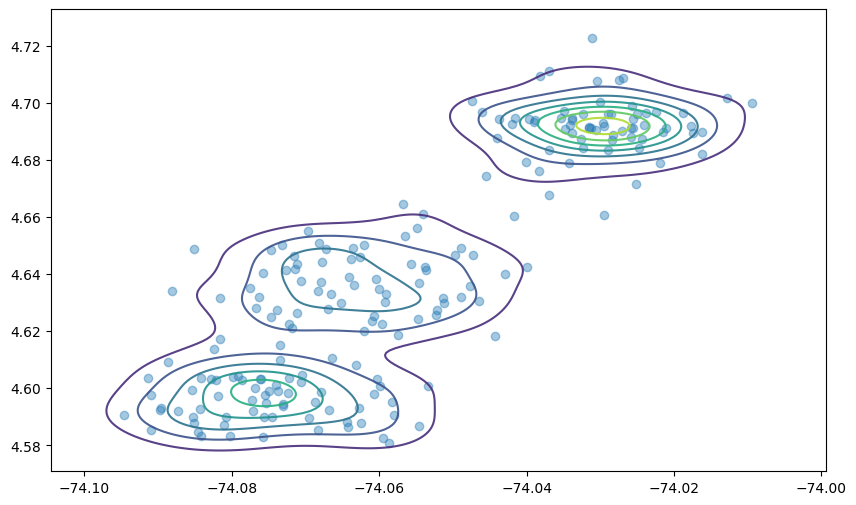

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))


ax.scatter(db.Longitud, db.Latitud, alpha=0.4)
ax.contour(
    xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.9
)


## Adquiriendo datos espaciales abiertos: [OpenStreetMap](https://www.openstreetmap.org/)

In [36]:
!pip install pyrosm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp311-cp311-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.8 MB/s eta 0:00:00
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp311-cp311-linux_x86_64.whl size=7783814 sha256=6c802167a65d81bae38b31c495ed1a23050ac44b955118aa94aefbf7b102dd6e
  Stored in directory: /root/.cache/pip/wheels/f3/77/c3/7b767c229a2bba06eb2e47fbce4cdbc4490b38d97f2a0ae64d
  Created wheel for cykhash: filename=cykhash-2.0.1-cp311-cp311-linux_x86_64.whl size=3602249 sha256=2d960b75ea679d02a1a11893375c4d2f59641293558dc67a5231b48c8aad63e7

In [37]:
from pyrosm import OSM, get_data

# Bajamos los datos para  Bogotá
fp = get_data("Bogota")

# Inicializamos el lector para Bogotá
osm = OSM(fp)

Downloaded Protobuf data 'Bogota.osm.pbf' (11.75 MB) to:
'/tmp/pyrosm/Bogota.osm.pbf'


In [38]:
# Obtenenemos los retail
landuse0 = osm.get_landuse(custom_filter={'landuse': ['retail',"commercial"]})

In [39]:
landuse = landuse0.copy()
landuse

,lon,lat,timestamp,id,tags,changeset,visible,version,landuse,geometry,osm_type
0,-74.123497,4.620684,0,2576361389,"{""shop"":""stationery""}",0.0,False,0,commercial,POINT (-74.1235 4.62068),node
1,-74.123505,4.620780,0,2576361390,"{""amenity"":""restaurant"",""name"":""Vaness Pizza""}",0.0,False,0,commercial,POINT (-74.1235 4.62078),node
2,-74.123558,4.621268,0,2710153596,"{""amenity"":""pharmacy"",""name"":""Drogueria Buganv...",0.0,False,0,commercial,POINT (-74.12356 4.62127),node
3,-74.130714,4.603890,0,5241868770,"{""addr:city"":""Bogot\u00E1 D.C."",""addr:housenum...",0.0,False,0,commercial,POINT (-74.13071 4.60389),node
4,NaN,NaN,0,24156083,"{""visible"":false,""addr:housename"":""Carvajal"",""...",NaN,NaN,0,commercial,"POLYGON ((-74.12022 4.68119, -74.12014 4.68109...",way
...,...,...,...,...,...,...,...,...,...,...,...
444,NaN,NaN,0,1356810640,"{""visible"":false}",NaN,NaN,0,commercial,"POLYGON ((-74.12428 4.64078, -74.12437 4.64062...",way
445,NaN,NaN,0,4232612588,"{""type"":""multipolygon""}",0.0,NaN,0,commercial,"POLYGON ((-74.10345 4.58763, -74.10342 4.58765...",relation
446,NaN,NaN,0,30856090717,"{""type"":""multipolygon""}",0.0,NaN,0,commercial,"MULTIPOLYGON (((-74.13111 4.65541, -74.13129 4...",relation
447,NaN,NaN,0,30897528332,"{""type"":""multipolygon""}",0.0,NaN,0,retail,"POLYGON ((-74.05439 4.66891, -74.0546 4.66902,...",relation


- Bajando datos de a poco

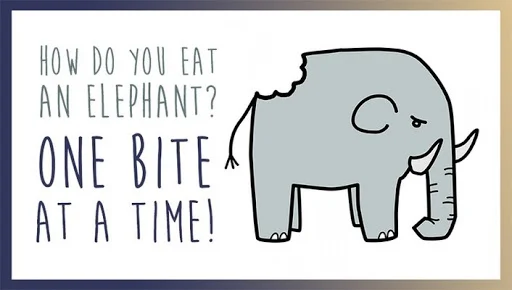

Downloaded Protobuf data 'Chicago.osm.pbf' (70.99 MB) to:
'/tmp/pyrosm/Chicago.osm.pbf'


ValueError: aspect must be finite and positive 

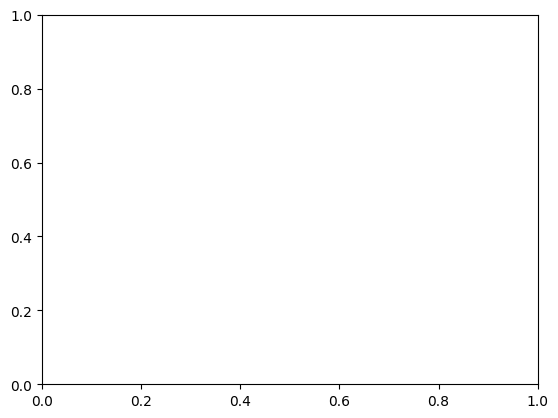

In [40]:
from pyrosm import OSM, get_data

# Bajamos los datos para  Bogotá
fp_bog = get_data("Chicago")

# Inicializamos el lector para Bogotá
osm = OSM(fp_bog)

bb_loop = osm.get_boundaries(name="La Candelaria")
bb_loop.plot()

In [ ]:
# Obtener bounding box
bbox_geom = bb_loop['geometry'].values[0]

# Bajar los datos
osm_loop = OSM(fp_bog, bounding_box=bbox_geom)

In [ ]:
landuse_cande = osm_loop.get_landuse(custom_filter={'landuse': ['retail',"commercial"]})

In [ ]:
landuse_cande.size

# Referencias

- Banik, R. (2018). Hands-on recommendation systems with Python: start building powerful and personalized, recommendation engines with Python. Packt Publishing Ltd.

- Google developers. (n.d.). Recommendation systems. Google. Consultado en Abril 3, 2022. Disponible en https://developers.google.com/machine-learning/recommendation/overview

- Google developers. (n.d.). Embeddings: Motivation From Collaborative Filtering. Consultado en Mayo 13, 2022. Disponible en  https://developers.google.com/machine-learning/crash-course/embeddings/motivation-from-collaborative-filtering

- Igual, L., & Seguí, S. (2017). Introduction to data science. In Introduction to data science (pp. 1-4). Springer, Cham.

- Leskovec, J., Rajaraman, A., & Ullman, J. D. (2020). Mining of massive data sets. Cambridge university press.